# Project: Titanic Machine Learning from Disaster
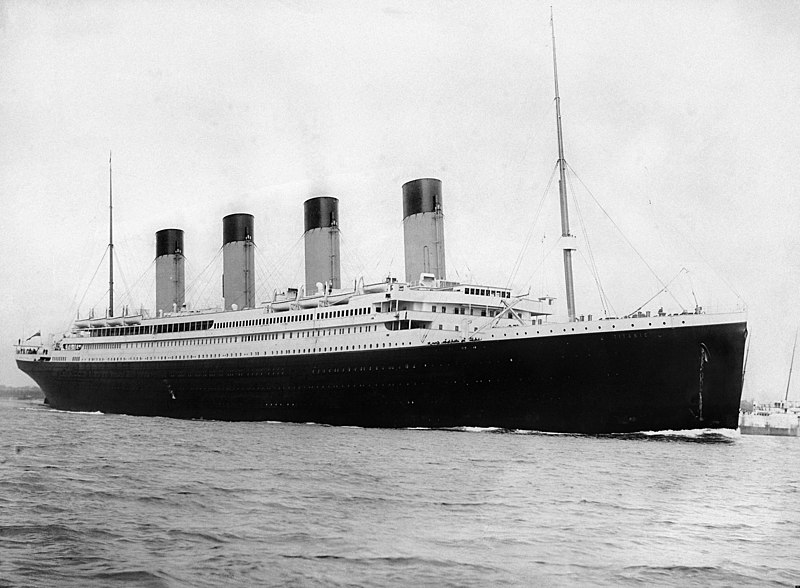

## 1. Load data

In [25]:
# import Lib and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("./Data/train.csv")
test_df = pd.read_csv("./Data/test.csv")

In [4]:
print(train_df.columns)
print(test_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


**Notice:**
- SibSp: number of siter/brother aboard titanic
- Parch: mumber of parent aboard titanic
- Embarked: Place where passenger go on the titanic
- Ticket: ticket number
- Cabin: Cabin number

In [5]:
# preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Passenger ID and Index columns are same => We set passenger ID to index column

In [8]:
train_df.set_index(train_df["PassengerId"], inplace=True)
train_df.drop("PassengerId", axis = 1, inplace=True)

In [9]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test_df = pd.read_csv("./Data/test.csv", index_col="PassengerId")

## 2.  Classification: Numerical and Categorical
* This help us select the appropriate plots to visualiation.

### Which features is numerical?
- Numerical features: `discrete`, `continous`, `timeseries` (roi rac, lien tuc, chuoi thoi gian)
- These value change from sample to sample

### Which features is categorical?
- Categorical features: `nomial`, `ordinal`, `ratio`, `interval` (danh nghia, thu tu, ty le, khong thoi gian)
- To classify the sample into sets of similial samples (phan loai mau thu vao 1 nhom mau thu giong nhau)

In [11]:
# To know we use info method
train_df.info()
# but its not completely accurate

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Take care of columns have missing data

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- Categorical Features of the data:
    `Survived`,`Sex`, `Cabin`, `Embarked`, `Pclass`, `SibSp`, `Parch`
- Numerical Features of the data:
    `Age`(continous), `Fare`(discrete)

- Mix type:
`Ticket`, `Cabin`

- Blank of NULL:
`Cabin` > `Age` > `Embarked`

In [15]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [18]:
converted_features = ["Pclass", "SibSp", "Parch", "Embarked", "Sex"]
def convert_cate(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")

convert_cate(train_df, converted_features)
convert_cate(test_df, converted_features)

## Distribution of Numerical features values across the samples

In [20]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


## Distribution of Categorical features values across the samples

In [21]:
train_df.describe(include=["category"])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## 3. Exploratory Data Analysius (EDA)

### Correlating of categorical features:

- Categorical: `Survived, Pclass, Sex, SibSp, Parch, Embarked`

**Target Variable**: `Survived`

In [23]:
train_df["Survived"].value_counts().to_frame() # Count

,count
Survived,
0,549
1,342


In [24]:
train_df["Survived"].value_counts(normalize=True).to_frame() # Percentage on

,proportion
Survived,
0,0.616162
1,0.383838


**Sex**

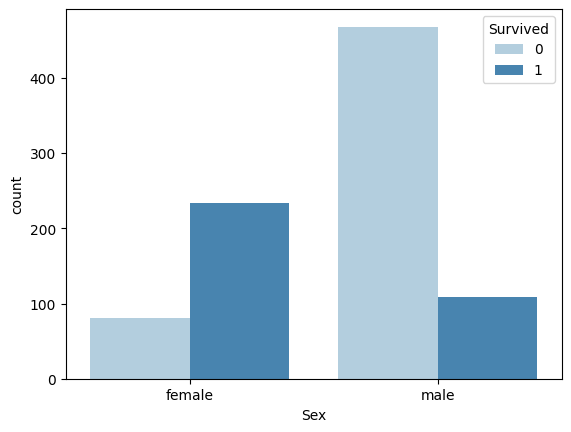

In [27]:
sns.countplot(data=train_df, x = "Sex", hue = "Survived", palette="Blues");

Survived Rate of female is higher than male

- Remaining Categorical columns
  

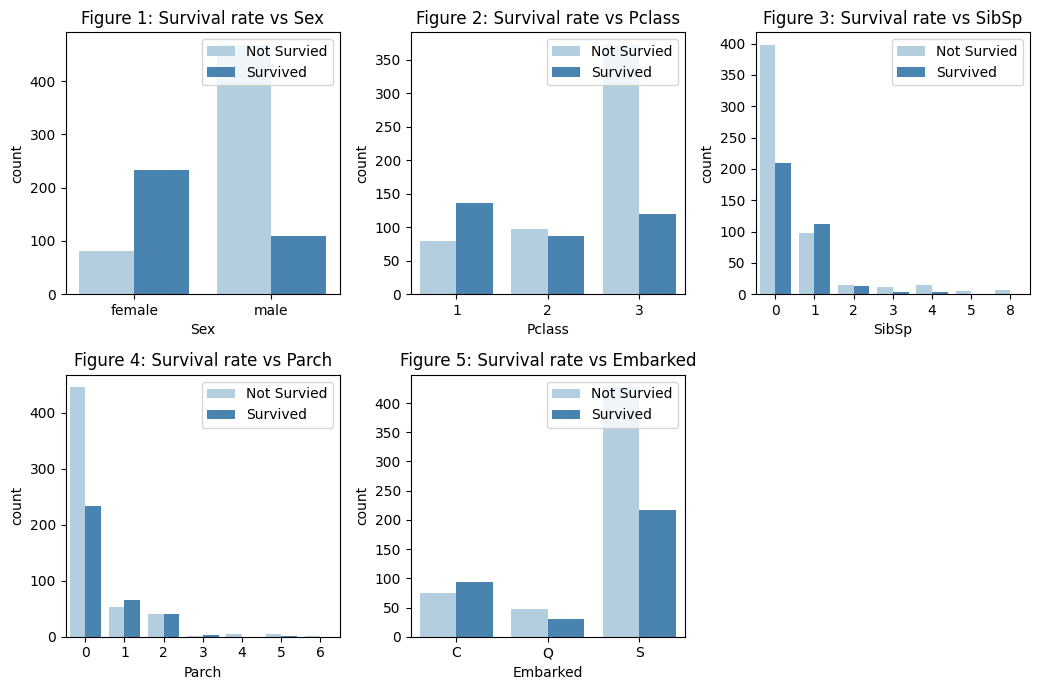

In [33]:
cols = ["Sex", "Pclass", "SibSp", "Parch", "Embarked"]
n_rows, n_cols = 2, 3

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c # index to loop through "cols"
        if i < len(cols):
            ax_i = ax[r, c]
            sns.countplot(data = train_df, x = cols[i], hue="Survived", palette="Blues", ax = ax_i)
            ax_i.set_title(f"Figure {i + 1}: Survival rate vs {cols[i]}")
            ax_i.legend(loc = "upper right", labels = ['Not Survied', 'Survived'])

# Trick hide subsplot we dont use:
ax.flat[-1].set_visible(False)
#----
plt.tight_layout()
plt.show()


#### Observation:

- Survival Rate:

    - Fig 1: Female > Male
    - Fig 2: 1st class had the highest survival rate
    - Fig 3: Solo traveler have mostly not survived
    - Fig 4: Solo traveler have mostly not survived
    - Fig 5: Most people embarked on S, and also had the highest not survival rate

### EDA with Numerical features

- Numerical Features: `Age`, `Fare`

**Age**

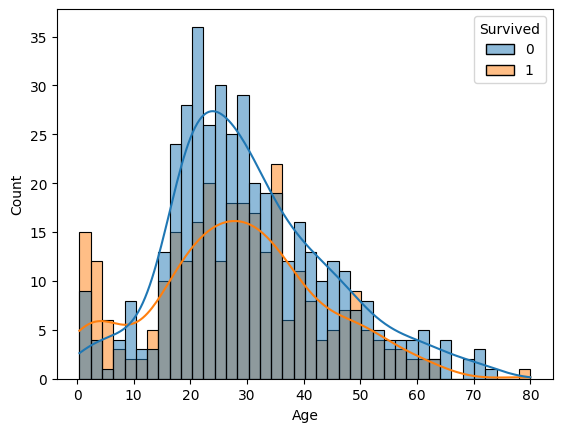

In [37]:
sns.histplot(data=train_df, x = "Age", hue = "Survived", bins = 40, kde=True);

- Most of people are from 18-40 ages
- Children had more chance to survived

**Fare**

In [39]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

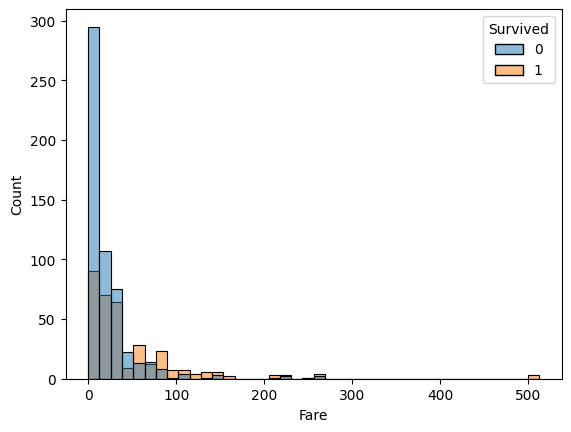

In [44]:
sns.histplot(data=train_df, x = "Fare", hue="Survived", bins = 40);

<Axes: xlabel='Fare', ylabel='count'>

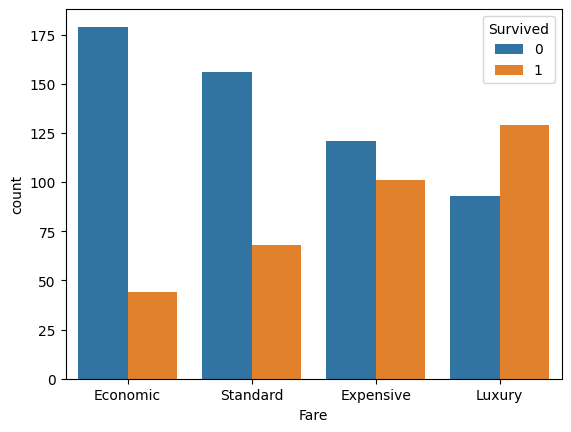

In [48]:
# To name for 0-25%, 25-50, 50-75, 75-100
# Use pd.qcut()
fare_categori = ["Economic", "Standard", "Expensive", "Luxury"]
qcut_data =  pd.qcut(train_df['Fare'], 4, labels=fare_categori)
sns.countplot(x=qcut_data, hue = train_df["Survived"])

- Passenger with Expensive and Luxury fare have more chance to survived

## 4. Feature Engineering and Wrangling Data

### Feature Engineering

**Name**
- Regular Extraction

In [50]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [64]:
import re #regular expression module

def extract_title(name):
    p = re.compile(r", ([]\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df["Title"] = train_df["Name"].apply(lambda name:extract_title(name)) # Create a new features is called "Features Engineering"

In [65]:
train_df["Title"].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [68]:
test_df["Title"] = test_df["Name"].apply(lambda name:extract_title(name))
test_df["Title"].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

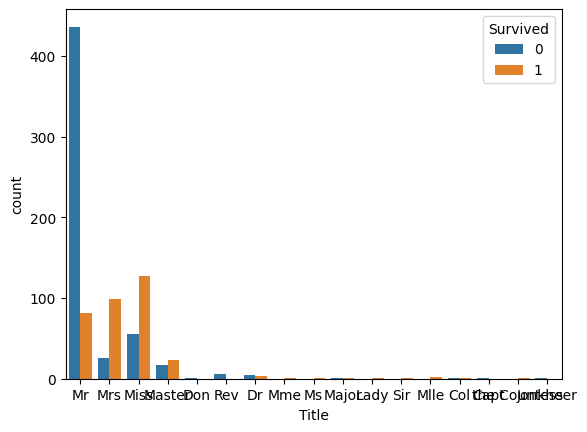

In [70]:
# Check to see if the new feature is useful or not?
sns.countplot(data=train_df, x = "Title", hue = "Survived");

In [72]:
# Group title which has small of quantity
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Other"
train_df['Title'] = train_df['Title'].apply(lambda title:group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title:group_title(title))

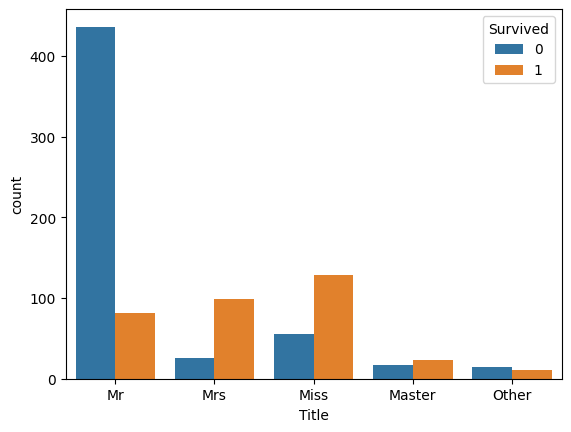

In [74]:
sns.countplot(data=train_df, x = "Title", hue = "Survived");

**Family: Parch, SibSp**

In [80]:
def group_family(df):
    df["FamilyNum"] = df["SibSp"].astype("int32") + df["Parch"].astype("int32")

group_family(train_df)
group_family(test_df)

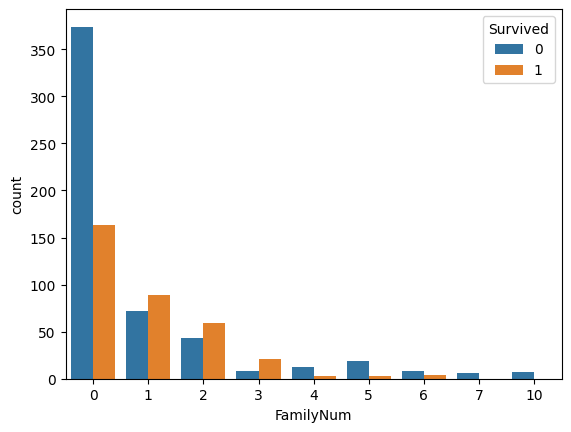

In [82]:
sns.countplot(data=train_df, x = "FamilyNum", hue = "Survived");

In [104]:
train_df["Family_cat"] = pd.cut(train_df["FamilyNum"], bins=[-1 , 1, 4, 6, 20], labels=['Solo Player', 'Small', 'Medium', 'Large'])
test_df["Family_cat"] = pd.cut(test_df["FamilyNum"], bins=[-1 , 1, 4, 6, 20], labels=['Solo Player', 'Small', 'Medium', 'Large'])

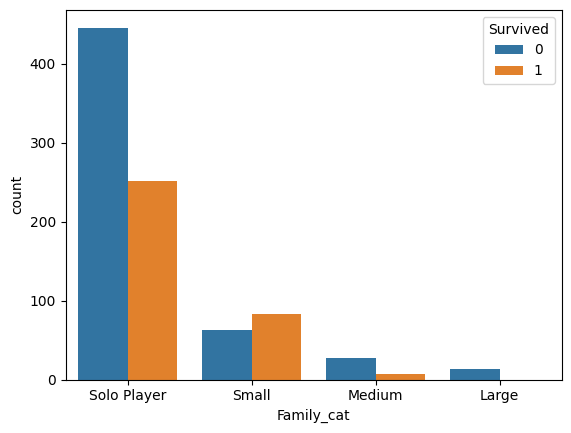

In [105]:
sns.countplot(data=train_df, x = "Family_cat", hue = "Survived");

### Data Wrangling

#### Data Cleaning

In [103]:
num_features = ['Age', 'Fare']
cat_features = ['Pclass', 'Sex', 'Embarked', 'Family_cat', 'Title']

features_col = num_features + cat_features
features_col

['Age', 'Fare', 'Pclass', 'Sex', 'Embarked', 'Family_cat', 'Title']

In [115]:
def find_missing_data(df, features_col):
    for col in features_col:
        n_rows = len(df[col])
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count * 100/n_rows :.2f}% missing values")

In [118]:
find_missing_data(train_df, features_col)
find_missing_data(test_df, features_col)


Age has 19.87% missing values
Embarked has 0.22% missing values
Age has 20.57% missing values
Fare has 0.24% missing values


### Filling missing values
#### Age
- Fill missing values with `median` of whole dataset

In [124]:
age_by_pclass_sex = train_df.groupby(["Sex", "Pclass"])['Age'].median()

C:\Users\Thang\AppData\Local\Temp\ipykernel_18832\1817957134.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_pclass_sex = train_df.groupby(["Sex", "Pclass"])['Age'].median()


In [125]:
age_by_pclass_sex

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [136]:
# Filling the missing values in Age with the medians of Sex and Pclass groups
train_df['Age'] = train_df.groupby(["Sex", "Pclass"])['Age'].transform(lambda x : x.fillna(x.median()))
# Aplly too with test set
test_df['Age'] = test_df.groupby(["Sex", "Pclass"])['Age'].transform(lambda x : x.fillna(x.median()))

C:\Users\Thang\AppData\Local\Temp\ipykernel_18832\4002092362.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df['Age'] = train_df.groupby(["Sex", "Pclass"])['Age'].transform(lambda x : x.fillna(x.median()))
C:\Users\Thang\AppData\Local\Temp\ipykernel_18832\4002092362.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_df['Age'] = test_df.groupby(["Sex", "Pclass"])['Age'].transform(lambda x : x.fillna(x.median()))


In [137]:
find_missing_data(train_df, features_col)
find_missing_data(test_df, features_col)

Embarked has 0.22% missing values
Fare has 0.24% missing values


In [138]:
X = train_df[features_col]
y = train_df['Survived']

X_test = test_df[features_col]

In [140]:
# preprocessing pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('scale', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [141]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [142]:
preprocessor.fit(X)
X = preprocessor.transform(X)
X_test = preprocessor.transform(X_test)

## 5. Model Training

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [145]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [146]:
X_test.shape

(418, 19)

In [163]:
# Binary Classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [158]:
log_reg.score(X_val, y_val)

0.8212290502793296

In [160]:
y_pred = log_reg.predict(X_val)
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.7534246575342466, 0.7971014492753623)

In [164]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       110
           1       0.75      0.80      0.77        69

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.82      0.82      0.82       179



In [165]:
# polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.transform(X_val)

In [166]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_X_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [167]:
poly_log_reg.score(poly_features_X_val, y_val)

0.8268156424581006

In [173]:
# Decision Tree test
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=5)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [172]:
decision_tree.score(X_val, y_val)

0.8156424581005587

## Cross-Validation

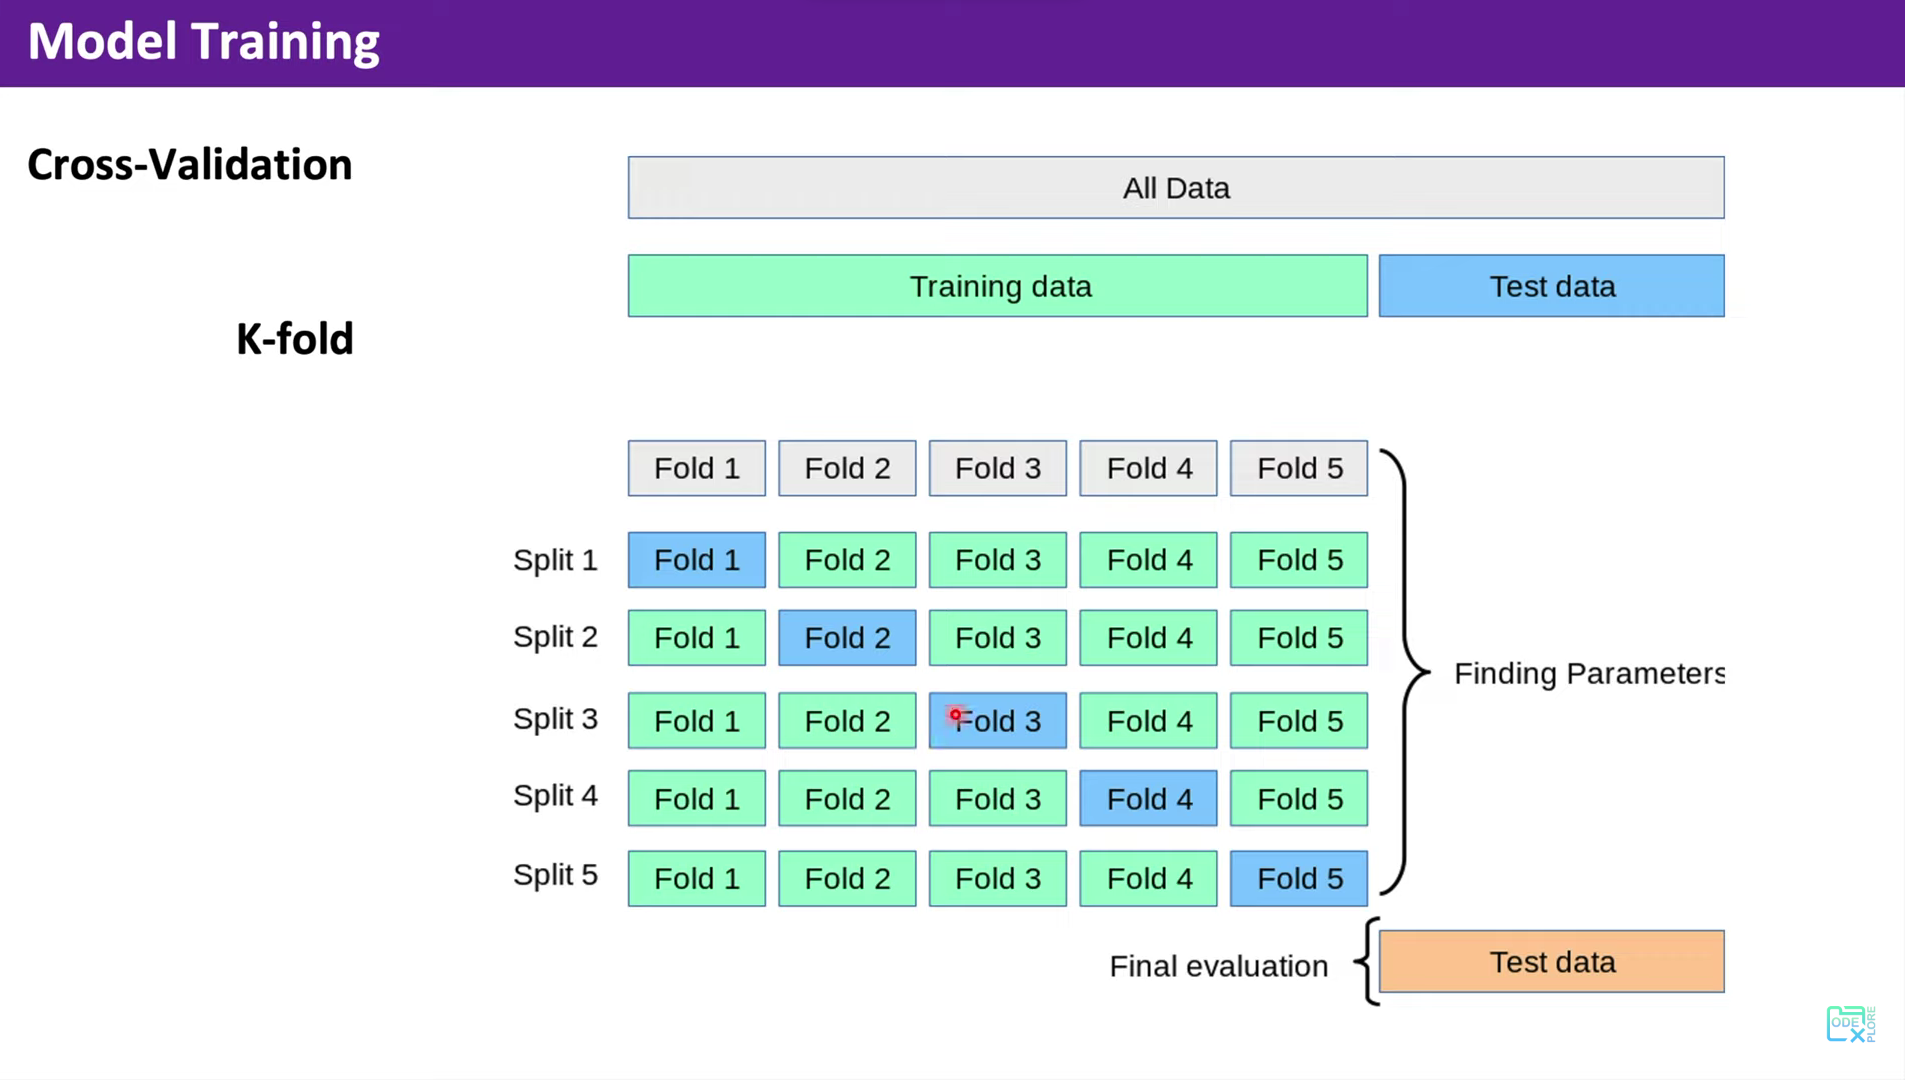

In [174]:
from sklearn.model_selection import cross_val_score

In [176]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
decision_tree_cv = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)

lr_scores = cross_val_score(log_reg_cv, X, y, scoring='accuracy', cv = 5)

In [179]:
lr_scores.mean(), lr_scores.std()

(0.8204255853367648, 0.02635371249204157)

In [180]:
dt_scores = cross_val_score(decision_tree_cv, X, y, scoring='accuracy', cv = 5)
dt_scores.mean(), dt_scores.std()

(0.7979850605737242, 0.015410220578274068)

### Base-Line Models

In [195]:
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier #pip install xgboost
seed = 0

models = [
    LinearSVC(max_iter=12000, random_state=seed, dual='auto'),
    SVC(max_iter=12000, random_state = seed),
    KNeighborsClassifier(metric='minkowski', p = 2),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=seed),
    RandomForestClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric = 'logloss', random_state = seed)
]

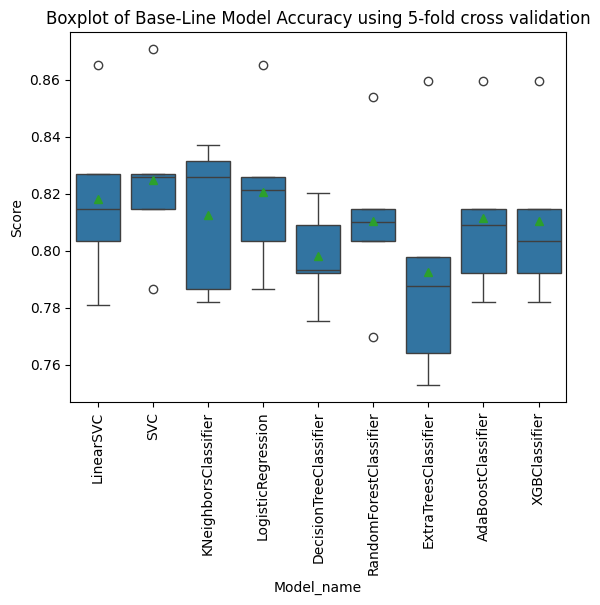

,Mean,Standart Deviation
Model_name,,
SVC,0.824914,0.030370
LogisticRegression,0.820426,0.029464
LinearSVC,0.818172,0.031243
KNeighborsClassifier,0.812604,0.026170
AdaBoostClassifier,0.811481,0.029845
XGBClassifier,0.810357,0.030067
RandomForestClassifier,0.810326,0.030091
DecisionTreeClassifier,0.797985,0.017229
ExtraTreesClassifier,0.792373,0.041627


In [202]:
from sklearn.model_selection import StratifiedGroupKFold # Balance classification 0 and 1
def generate_baseline_result(models, X, y, metrics = 'accuracy', cv = 5, plot_results = False):
    # define kfold
    # kfold = StratifiedGroupKFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring='accuracy', cv = 5)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))

    cv_df = pd.DataFrame(entries, columns=['Model_name', 'Fold_id', 'Score'])

    if plot_results:
        sns.boxplot(data = cv_df, x='Model_name', y = 'Score', showmeans=True)
        plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross validation")
        plt.xticks(rotation = 90)
        plt.show()
    # Summary result
    mean = cv_df.groupby("Model_name")['Score'].mean()
    std = cv_df.groupby("Model_name")['Score'].std()

    base_line_result = pd.concat([mean, std], axis = 1, ignore_index=True)
    base_line_result.columns = ["Mean", "Standart Deviation"]

    # Sort by accuracy score
    base_line_result.sort_values(by="Mean", inplace=True, ascending=False)
    return base_line_result

generate_baseline_result(models, X, y, metrics = 'accuracy', cv = 5, plot_results = True)

In [212]:
# Choose SVC to fine tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
fine_tune_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

param_grid = {
    'classifier__C': [0.1, 1, 10, 100],  # tham số C của SVC
    'classifier__gamma': [1, 0.1, 0.01, 0.001],  # tham số gamma của SVC
    'classifier__kernel': ['rbf', 'linear']  # kernel của SVC
}

grid = GridSearchCV(fine_tune_pipeline, param_grid, cv=5, verbose=0)

In [213]:
grid.fit(X_train, y_train)
print("Best parameters: ", grid.best_params_)

Best parameters:  {'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}


In [214]:
# Apply best parameter for last model
best_model = SVC(C=100, gamma=0.01, kernel='rbf')
best_model.fit(X_train, y_train)

SVC(C=100, gamma=0.01)

In [216]:
y_pred = best_model.predict(X_val)

In [217]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       110
           1       0.80      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [218]:
y_pred_test = best_model.predict(X_test)
y_pred_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [235]:
submission = pd.read_csv('./Data/gender_submission.csv', index_col='PassengerId')
submission['Survived'] = y_pred_test
submission.to_csv('submission.csv')